In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

employee_salaries = pd.read_csv('salary.csv')
print(employee_salaries)

      salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
0    53000.0        0            0          0    1.17       1          0   
1    58000.0        1            0          0    1.24       1          0   
2    45500.0        0            0          0    1.21       1          0   
3    35782.0        0            2          1    0.99       1          0   
4    34731.0        0            2          2    0.91       1          0   
..       ...      ...          ...        ...     ...     ...        ...   
509  45906.0        6           17         11    0.92       1          0   
510  60402.0        6           19          7    0.86       1          0   
511  53187.0       19            7          6    0.78       1          0   
512  56542.0        8           20         10    0.78       1          0   
513  52662.0       13           25         11    0.78       1          0   

     position  male  Field  yearsabs  
0           1     1      3         0  
1        

In [206]:
#Checking for responders
employee_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [207]:
#Checking for missing values
employee_salaries.isnull()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
509,False,False,False,False,False,False,False,False,False,False,False
510,False,False,False,False,False,False,False,False,False,False,False
511,False,False,False,False,False,False,False,False,False,False,False
512,False,False,False,False,False,False,False,False,False,False,False


In [208]:
#Checking if there are any missing values
employee_salaries.isnull().values.any()

True

In [209]:
# Getting the minimun value in the salary column
employee_salaries['salary'].min()

29000.0

In [210]:
# Getting the maximum value in the salary column
employee_salaries['salary'].max()

96156.0

In [211]:
#Finding the mean salary
employee_salaries.loc[:,'salary'].mean()

50863.22009783625

In [212]:
#Finding the standard error of the mean
import statsmodels as sm
st_err_m = employee_salaries['salary'].sem()
print(st_err_m)

560.0622753925232


In [213]:
#Standard deviation of years worked
employee_salaries.loc[:,'yearsworked'].std()

9.444695144169803

In [214]:
#calculating the median salary
employee_salaries.loc[:,'salary'].median()

50096.0

In [215]:
#The interquartile range for salary
import numpy as np
Q1 = employee_salaries['salary'].quantile(0.25)
Q3 = employee_salaries['salary'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20345.0


In [216]:
#Counting number of men
male = len(employee_salaries[employee_salaries.male == 1])
print(male)

386


In [217]:
#Counting number of women
women = len(employee_salaries[employee_salaries.male == 0])
print(women)

128


In [218]:
#Create a table for men and women
gender_table = employee_salaries.male.value_counts()
print(gender_table)

1    386
0    128
Name: male, dtype: int64


In [219]:
employee_salaries[['male','position']]

,male,position
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
509,0,2
510,0,3
511,0,3
512,0,3


In [220]:
len(employee_salaries[(employee_salaries.position == 3)])

211

In [221]:
len(employee_salaries[(employee_salaries.male == 1)&(employee_salaries.position == 3)])

192

In [222]:
len(employee_salaries[(employee_salaries.male == 0)&(employee_salaries.position == 3)])

19

(array([19., 44., 50., 52., 38., 44., 33., 49., 43., 44., 37., 19., 19.,
         9.,  3.,  4.,  2.,  0.,  3.,  1.]),
 array([29000. , 32357.8, 35715.6, 39073.4, 42431.2, 45789. , 49146.8,
        52504.6, 55862.4, 59220.2, 62578. , 65935.8, 69293.6, 72651.4,
        76009.2, 79367. , 82724.8, 86082.6, 89440.4, 92798.2, 96156. ]),
 <a list of 20 Patch objects>)

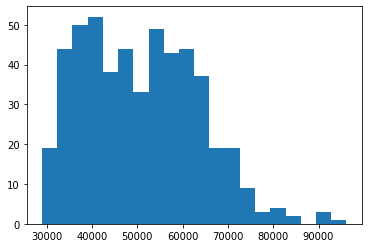

In [223]:
#Creating a histogram from salary
salary = employee_salaries['salary']
plt.hist(salary, bins = 20)

# From the histogram, we can see that people with less than 10years experience earn the highest earners. 
#This could be because of their level of education and the positions they are in.

In [263]:
#Creating a bar graph to show the different average salaries of men and women.


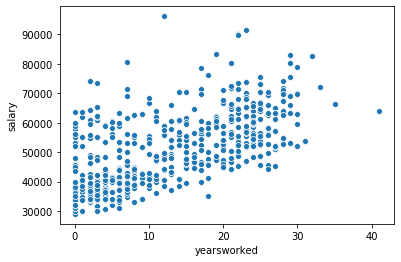

In [265]:
sns.scatterplot(x="yearsworked", y="salary", data=employee_salaries)